In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2



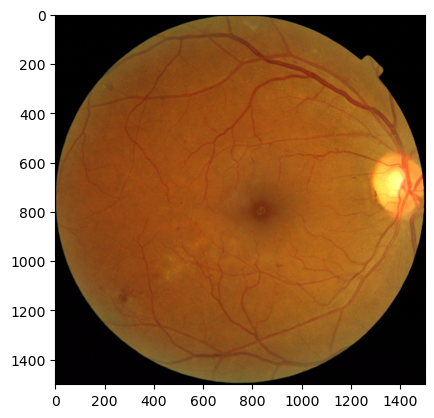

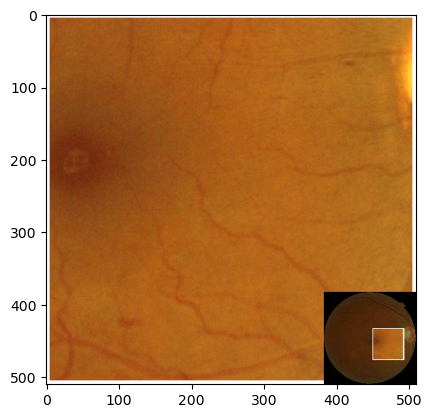

In [41]:
path = '/home/clement/Documents/phd/DR/MessidorAnnotation/img/images/20051019_38557_0100_PP.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)[:,:, ::-1]

def imshow(img):
    plt.imshow(img)
    plt.show()


def fcrop(image:np.ndarray, crop_region:tuple[int, int, int, int], pad=10, zoom_out=True, fade=0.7):
    """
    param crop_region: Tuple (y, x, h, w)
    """
    y, x, w, h = crop_region
    crop = image[y:y+h, x:x+h]
    if pad:
        crop = np.pad(crop, ((pad, pad), (pad, pad), (0, 0)), constant_values=255)
    hc, wc, _ = crop.shape
    if zoom_out:
        mask_filter = np.ones_like(image)
        mask_filter[y:y+h, x:x+h] = 0
        output = ((image * fade * mask_filter) + image * (1 - mask_filter)).astype(np.uint8)
        kernel = np.ones((15,15))
        gradient = cv2.morphologyEx(255*(1-mask_filter), cv2.MORPH_GRADIENT, kernel)
        output[gradient>0] = 255
        output = cv2.resize(output, (hc // 4, wc // 4))            
        ho, wo, _ = output.shape
        crop[-ho:, -wo:] = output
        
    return crop


crop = (600, 800, 500, 500)
imshow(img)
imshow(fcrop(img, crop, fade=0.5, pad=5))